# 1) load the data into a dataframe df, show its size and head, eliminate the rows containing null values and show the number of remaining rows 

In [136]:
import pandas as pd

# Load dataframe
df = pd.read_csv('./country_stats.csv')

# Show size and head
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

df.dropna(inplace=True)

print(f"After dropping rows with null values, the dataframe has {df.shape[0]} rows")

The dataframe has 242 rows and 8 columns
After dropping rows with null values, the dataframe has 221 rows


# 2) produce a pairplot of the numeric columns of df and comment relevant situations

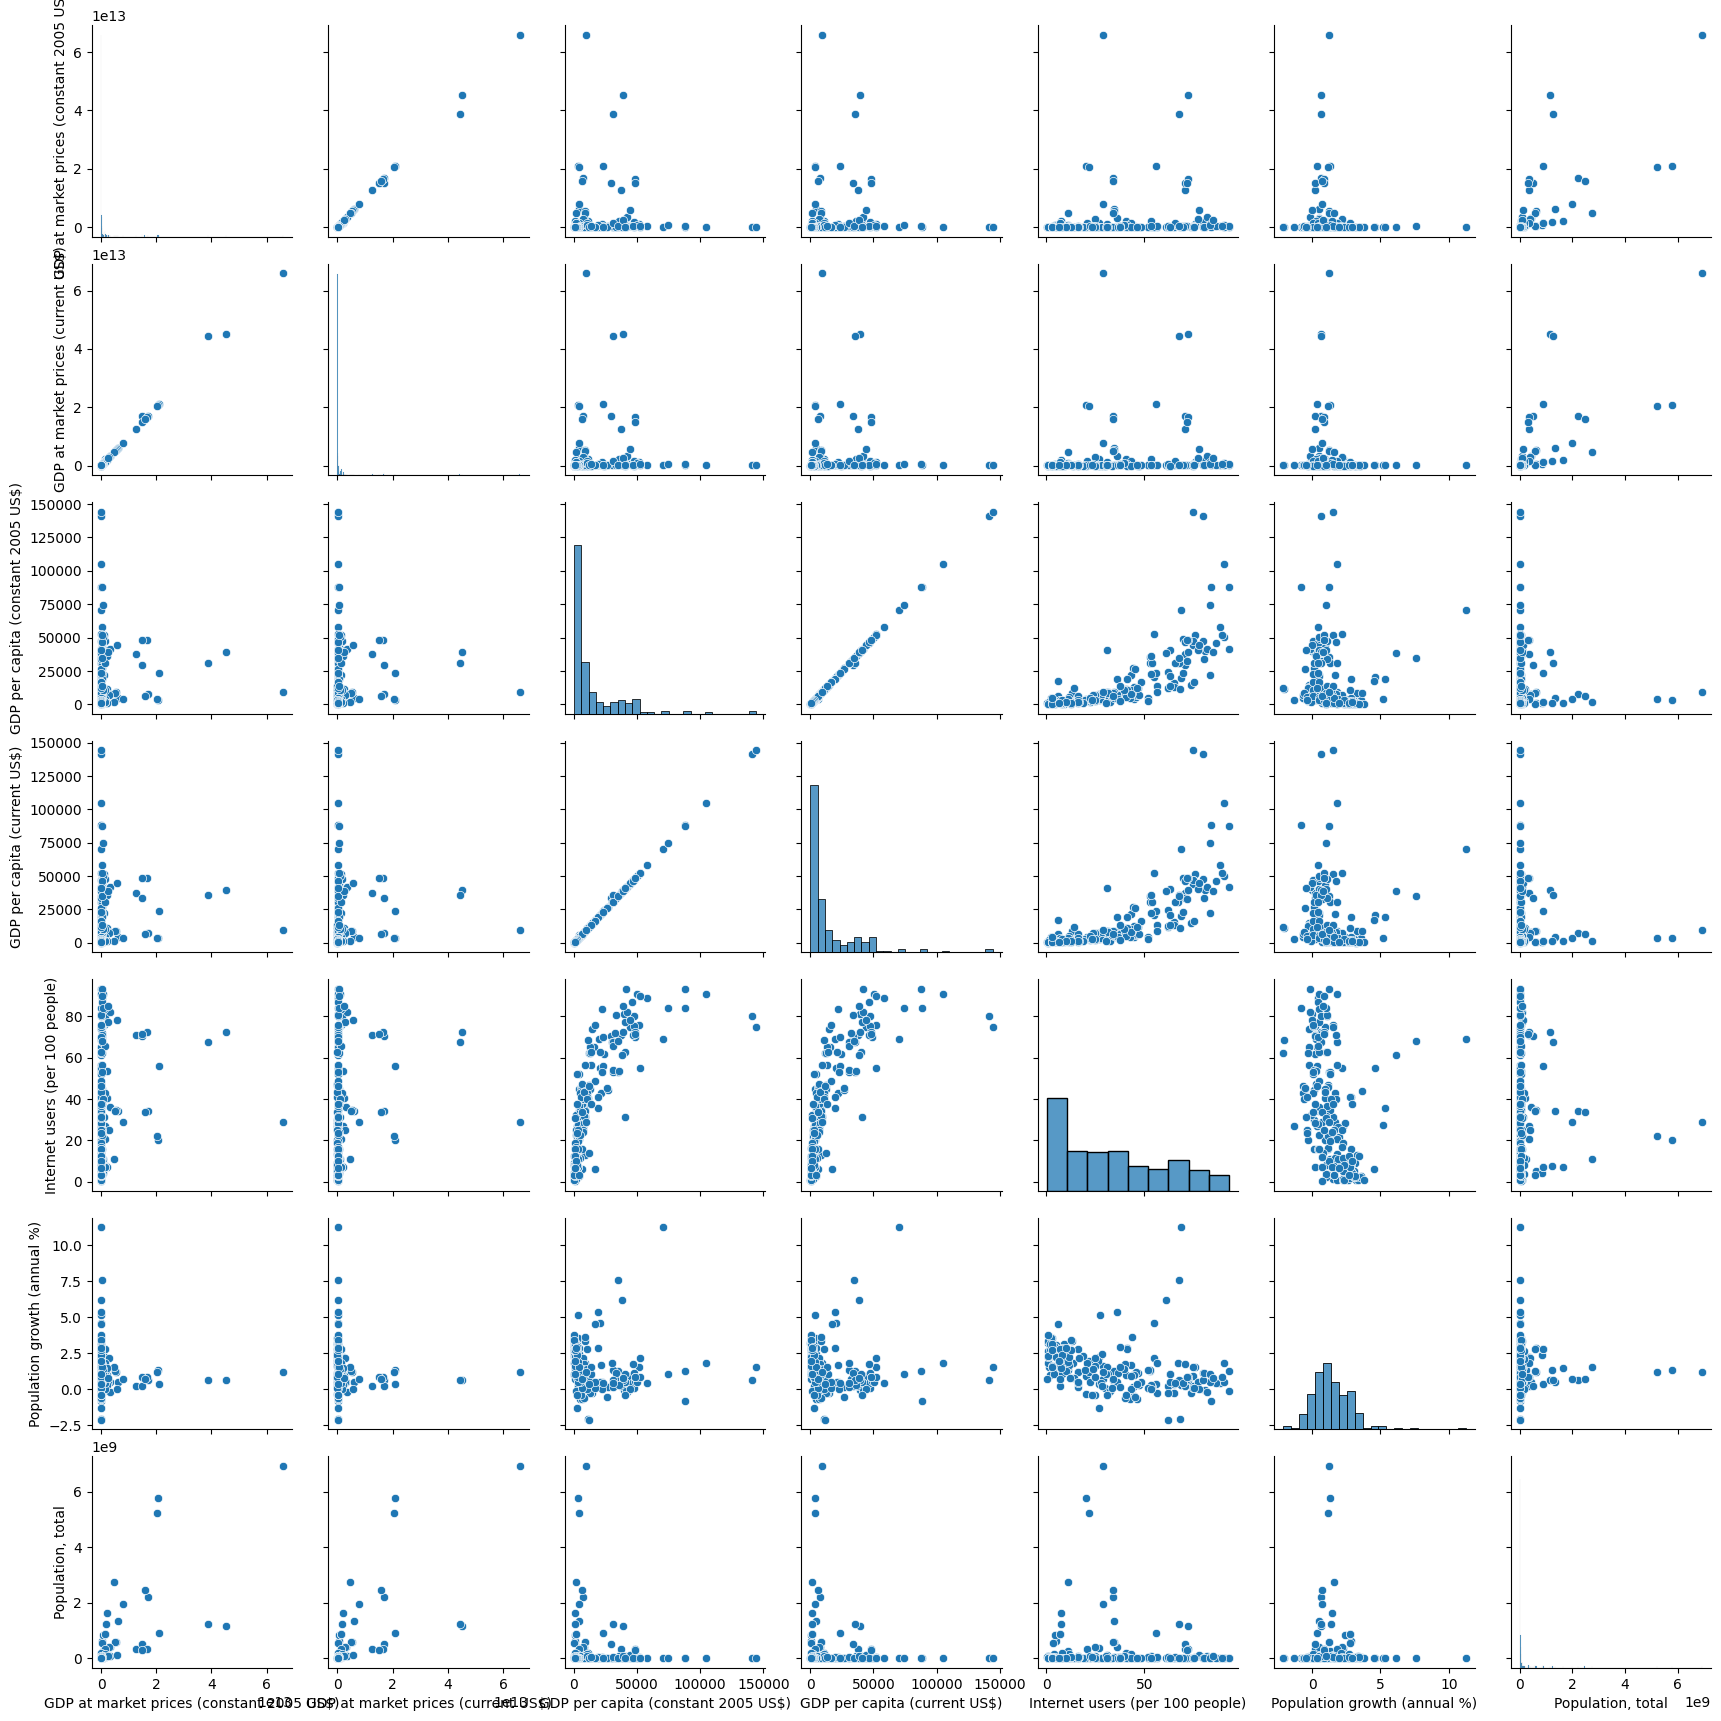

In [137]:
import seaborn as sns

# I have to consider only the numeric columns -> not the first one
sns.pairplot(df.drop(['Country Name'], axis=1))

From the pairplots we can see that we have data of different ranges and the distributions are not centered but they are close to the axes.

# 3)  Produce a box plot of the numeric columns of df and comment relevant situations

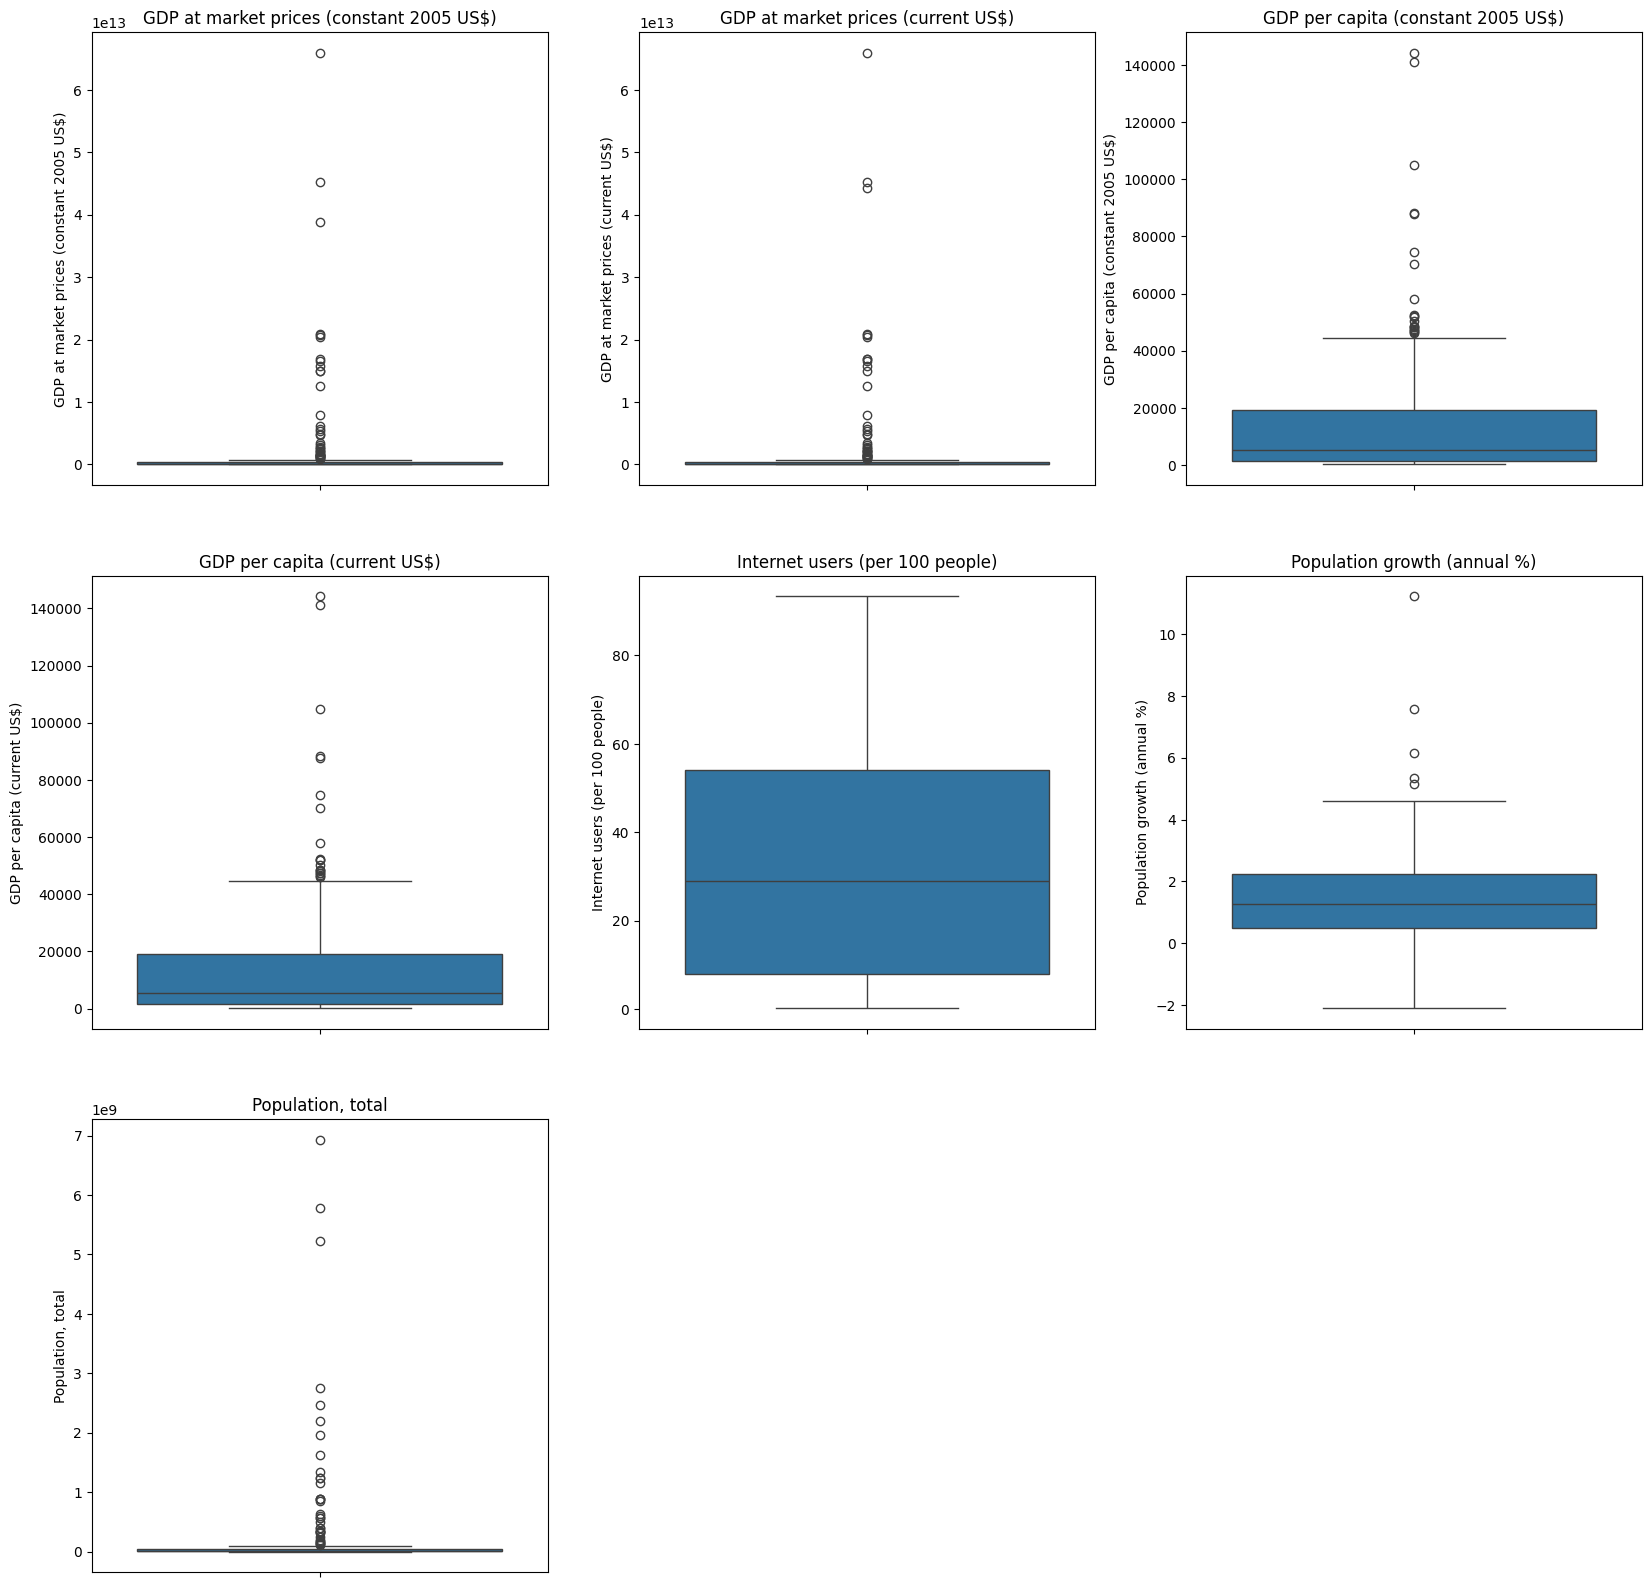

In [138]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))

i = 1
for c in df.columns[1:] :
    plt.subplot(3,3,i).set_title(c)
    sns.boxplot(df[c])
    i += 1

From the boxplots we can notice a large numbero of outliers in the second, third and last attribute, while the fourth and fifth have a median which is not centered and so it means they don't have balanced distributions.

# 4) Produce the correlation matrix of the data and eliminate the redundant attributes, if it is adequate
- For example, if attributes a and b have high correlation (e.g. 
absolute value higher than 0.95) one of the two can be 
eliminated 

- Refer to this (https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas) for the generation of the correlation matrix

In [139]:
cm = df.drop(['Country Name'], axis=1) .corr()

corr_threshold = 0.95
columns_to_drop = []

# Eliminate the redundant attributes
for a1 in range(cm.shape[1]) :
    for a2 in range(cm.shape[1]) :
        if a1 != a2 : # don't count 1 correlation
            if cm.iloc[a1, a2] >= corr_threshold : 
                # If none of them already to be dropped we dropped the first one
                if (cm.columns[a1] not in columns_to_drop) and (cm.columns[a2] not in columns_to_drop):
                    print(f"Drop {a1} : {cm.columns[a1]}")
                    print(f"Which is correlated to {a2} for {cm.iloc[a1, a2]}")
                    print('#'*40)
                    columns_to_drop.append(cm.columns[a1])

cm.drop(columns_to_drop, axis=1, inplace=True) # Drop the column
cm.drop(columns_to_drop, inplace=True) # Drop the row

# The correlaton matrix
display(cm)

# We have to change the dataframe
df.drop(columns=columns_to_drop, axis=1, inplace=True) # Drop the column

df.head()


Drop 0 : GDP at market prices (constant 2005 US$)
Which is correlated to 1 for 0.9986711056017947
########################################
Drop 2 : GDP per capita (constant 2005 US$)
Which is correlated to 3 for 0.9998286363434394
########################################


,GDP at market prices (current US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
GDP at market prices (current US$),1.000000,0.091601,0.143265,-0.103523,0.731674
GDP per capita (current US$),0.091601,1.000000,0.758325,-0.102485,-0.075101
Internet users (per 100 people),0.143265,0.758325,1.000000,-0.356460,-0.062403
Population growth (annual %),-0.103523,-0.102485,-0.356460,1.000000,-0.037483
"Population, total",0.731674,-0.075101,-0.062403,-0.037483,1.000000


,Country Name,GDP at market prices (current US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,Afghanistan,1.593680e+10,553.300289,4.0,2.812617,28803167.0
1,Albania,1.192695e+10,4094.358832,45.0,-0.496462,2913021.0
2,Algeria,1.612073e+11,4463.394675,12.5,1.821358,36117637.0
4,Andorra,3.355695e+09,39736.354063,81.0,-0.015393,84449.0
5,Angola,8.247091e+10,3529.053482,2.8,3.570099,23369131.0


# 5) Split the reduced data: store the first column in a vector keys and the others in a matrix X 

In [140]:
target = df.columns[0]

y = df[target]
X = df.drop(target, axis=1)

# 6) Find the best clustering scheme for the data (possibly reduced after step 4) with a method of your choice, plot global silhouette index for an appropriate range of hyperparameter(s) and show the chosen hyperparameter(s)

In [141]:
X

,GDP at market prices (current US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,1.593680e+10,553.300289,4.000000,2.812617,2.880317e+07
1,1.192695e+10,4094.358832,45.000000,-0.496462,2.913021e+06
2,1.612073e+11,4463.394675,12.500000,1.821358,3.611764e+07
4,3.355695e+09,39736.354063,81.000000,-0.015393,8.444900e+04
5,8.247091e+10,3529.053482,2.800000,3.570099,2.336913e+07
...,...,...,...,...,...
237,8.913100e+09,2338.719877,37.400000,2.898629,3.811102e+06
238,6.595453e+13,9516.346699,28.854046,1.218629,6.930657e+09
239,3.090675e+10,1309.231960,12.350000,2.713034,2.360678e+07
240,2.026556e+10,1463.213573,10.000000,2.883152,1.385003e+07


In [142]:
## I choose KMeans ##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# I set the range of parameters
num_clusters_range = range(2, 10)
random_state = 42

# I set the lists of score
silhouette_scores = []
inertia_scores = []

# I try all the parameters as collect the scores
for k in num_clusters_range :
    km = KMeans(n_clusters=k, random_state=random_state)
    y_km = km.fit_predict(X)

    inertia_scores.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, y_km))

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


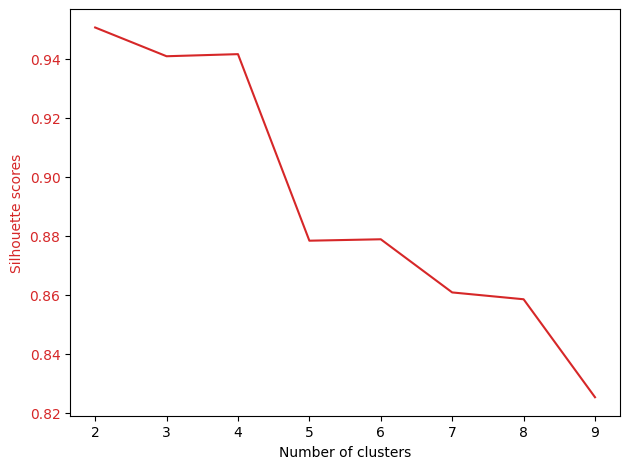

In [143]:
## Plot the silhouette index ##
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores', color=color)
ax.plot(num_clusters_range, silhouette_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()


We can see that the silhouette index is maximized with 2 clusters, so we'll choose K=2

In [144]:
import numpy as np

best_k = num_clusters_range[np.argmax(silhouette_scores)]

# 7) Fit the clustering scheme to y, then produce the silhouette plot using the function plot_silhouette contained in the attached file

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


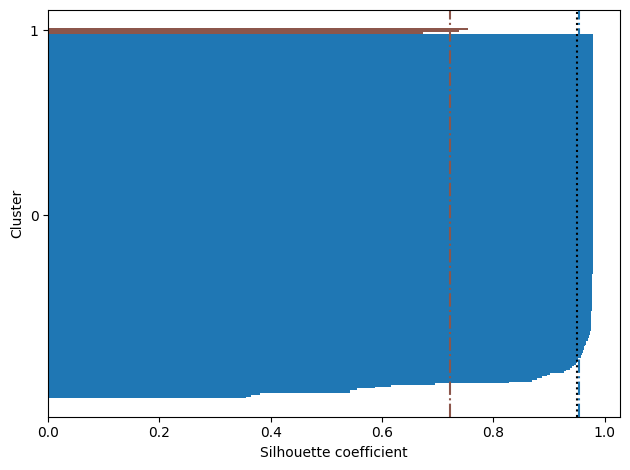

In [145]:
km = KMeans(n_clusters=best_k, random_state=random_state)
y_km = km.fit_predict(X)

from sklearn.metrics import silhouette_samples
import plot_silhouette as ps
ps.plot_silhouette(silhouette_samples(X, y_km), y_km)

# 8) Perform a logarithmic transformation of the data
- This means simply to apply the log function of numpy
- If one of the columns has zero or negative values, avoid its transformation

In [146]:
for c in X.columns :
    # If the minimum value is positive, we're avoiding those who have zero or negative values
    if np.min(X[c]) > 0 : 
        X[c] = np.log(X[c])
X

,GDP at market prices (current US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,23.491897,6.315901,1.386294,2.812617,17.175996
1,23.202067,8.317365,3.806662,-0.496462,14.884701
2,25.805957,8.403665,2.525729,1.821358,17.402292
4,21.933925,10.590022,4.394449,-0.015393,11.343903
5,25.135711,8.168785,1.029619,3.570099,16.966927
...,...,...,...,...,...
237,22.910788,7.757359,3.621671,2.898629,15.153429
238,31.819987,9.160766,3.362250,1.218629,22.659220
239,24.154240,7.177196,2.513656,2.713034,16.977044
240,23.732189,7.288390,2.302585,2.883152,16.443798


# 9) repeat points 6 and 7 above and comment the comparison with the result of point 6 
(result of point 7)

In [147]:
# Rename variable for make them more readable
X_new = X

## 6

In [148]:
## I choose KMeans ##

# I set the range of parameters
num_clusters_range = range(2, 10)

# I set the lists of score
silhouette_scores = []
inertia_scores = []

# I try all the parameters as collect the scores
for k in num_clusters_range :
    km = KMeans(n_clusters=k, random_state=random_state)
    y_km_new = km.fit_predict(X_new)

    inertia_scores.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_new, y_km_new))

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

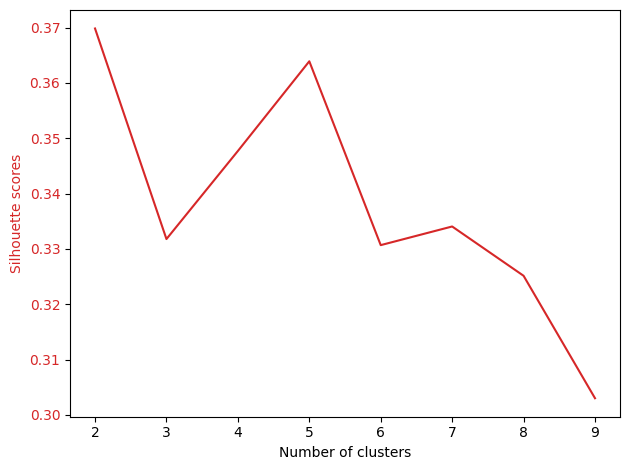

In [149]:
## Plot the silhouette index ##
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores', color=color)
ax.plot(num_clusters_range, silhouette_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

In [150]:
import numpy as np
best_k_new = num_clusters_range[np.argmax(silhouette_scores)]
best_k_new

2

At this point we can observe that the optimal number of clusters is still 2, but we have to notice that the silhouette with 5 clusters is way higher and so we could also consider it.

In [151]:
num_clusters_range_2 = list(num_clusters_range) # range -> list
i = num_clusters_range_2.index(best_k_new) # index of best K
num_clusters_range_2.remove(best_k_new) # remove the best K

In [156]:
# We remove the best silhouette
silhouette_scores.remove(silhouette_scores[i])

In [160]:
# We extract the second best K
best_k_new_2 = num_clusters_range_2[np.argmax(silhouette_scores)]

In [161]:
best_k_new_2

5

## 7

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


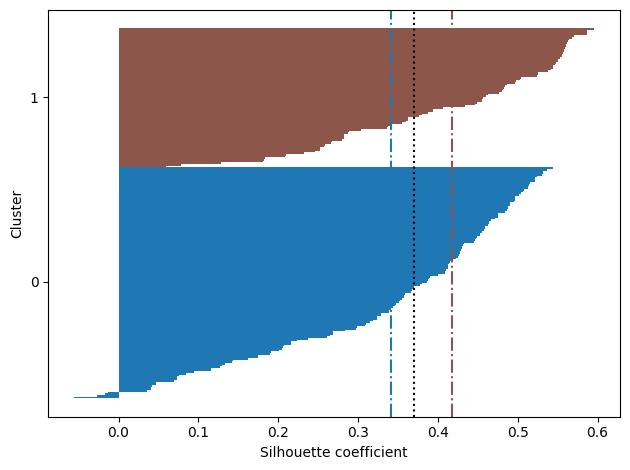

In [15]:
### Point 7 ###

# K = 2

km = KMeans(n_clusters=best_k_new, random_state=random_state)
y_km_new = km.fit_predict(X_new)

from sklearn.metrics import silhouette_samples
import plot_silhouette as ps
ps.plot_silhouette(silhouette_samples(X_new, y_km_new), y_km_new)

Now the clusters are more balanced, this because the log() is not linear and so might have commpressed data distributions and scaled the data.

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


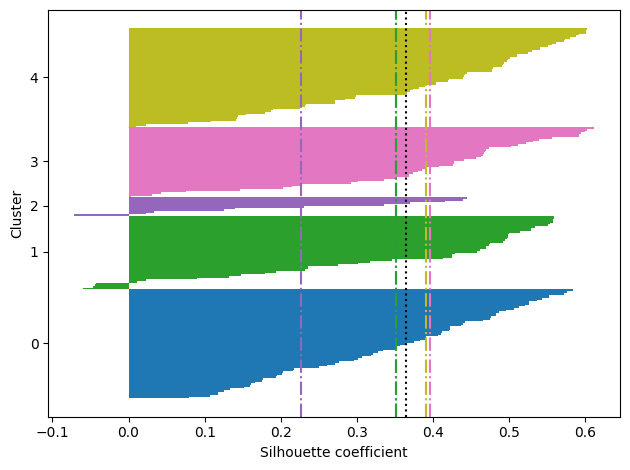

In [162]:
### Point 7 ###

# K = 5

km = KMeans(n_clusters=best_k_new_2, random_state=random_state)
y_km_new = km.fit_predict(X_new)

from sklearn.metrics import silhouette_samples
import plot_silhouette as ps
ps.plot_silhouette(silhouette_samples(X_new, y_km_new), y_km_new)